# 【1.1】分布分析 -- 研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量

- 极差 / 频率分布情况 / 分组组距及组数

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#读取数据
data = pd.read_csv('/Users/mac/Desktop/test/Python-DataAnalysis/CLASSDATA_Chapter03进阶算法学习：统计分析/CH01数据特征分析/深圳罗湖二手房信息.csv', encoding = 'GBK')
data.head()

<IPython.core.display.Javascript object>

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

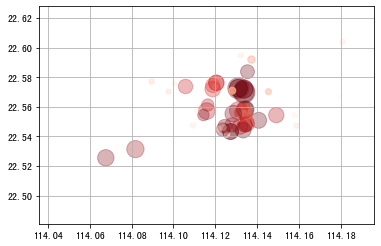

In [2]:
plt.scatter(data['经度'], data['纬度'],
           s = data['房屋单价']/200,
           c = data['参考总价'], 
           cmap = 'Reds',
           alpha = 0.3)#s为指定散点的大小，c为指定散点的颜色，alpha为指定散点的透明度，
#camp为指定散点的颜色映射

plt.grid()#网格

In [3]:
# 极差
def d_range(df, *cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return krange

key1 = '参考总价'
key2 = '参考首付'

dr = d_range(data, key1, key2)
print('%s极差为:%0.2f \n%s极差为:%0.2f' % (key1,dr[0],key2,dr[1]))

# a=data['参考总价'].max()-data['参考总价'].min()
# print(a)
# b=data['参考首付'].max()-data['参考首付'].min()
# print(b)

参考总价极差为:175.00 
参考首付极差为:52.50


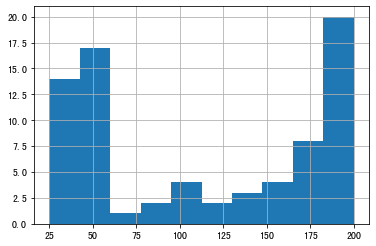

In [7]:
# 频率分布情况

data['参考总价'].hist(bins = 10)
# hist绘制直方图，bins直方图绘制的列数

In [7]:
#分组情况
a=pd.cut(data['参考总价'],10,right=False)#right不包括末端值
print(a.head())
b=a.value_counts(sort=False)
print(b)
data['%s分组区间' % '参考总价']=a.values
data.head()

0      [42.5, 60.0)
1      [25.0, 42.5)
2      [42.5, 60.0)
3      [25.0, 42.5)
4    [165.0, 182.5)
Name: 参考总价, dtype: category
Categories (10, interval[float64]): [[25.0, 42.5) < [42.5, 60.0) < [60.0, 77.5) < [77.5, 95.0) ... [130.0, 147.5) < [147.5, 165.0) < [165.0, 182.5) < [182.5, 200.175)]
[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64


,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"


# 【1.2】对比分析 -- 两个互相联系的指标进行比较

- 绝对数比较(相减) / 相对数比较(相除)
结果分析、比例分析、空间对比分析、动态对比分析

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

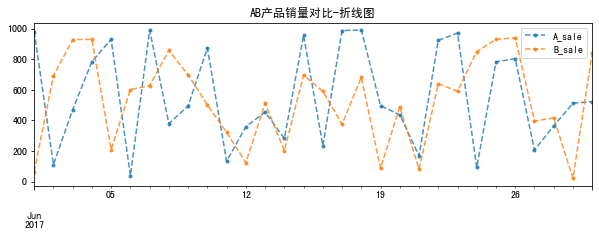

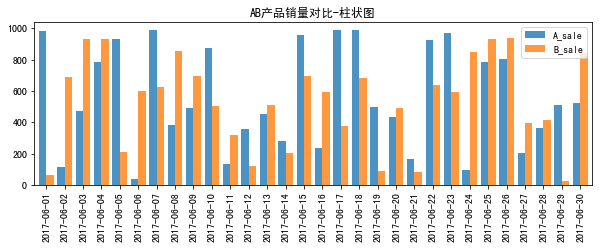

In [15]:
# 折线图、多系列柱状图比较

data = pd.DataFrame(np.random.rand(30,2)*1000,
                   columns = ['A_sale', 'B_sale'],
                   index = pd.period_range('20170601', '20170630'))
data.head()

data.plot(kind='line',
         style = '--.',
         alpha = 0.8,
         figsize = (10,3),
         title = 'AB产品销量对比-折线图')

data.plot(kind='bar',
         width = 0.8,
         alpha = 0.8,
         figsize = (10,3),
         title = 'AB产品销量对比-柱状图')

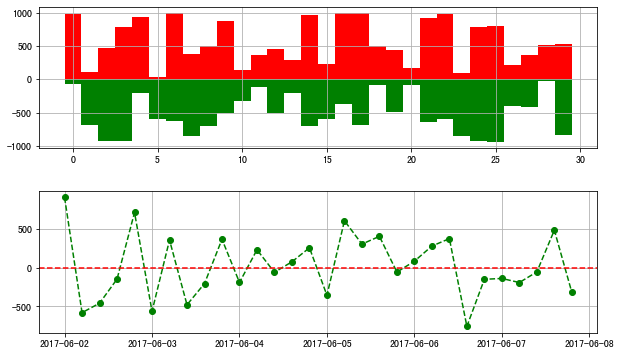

In [17]:
# 绝对数比较 相减

x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']

fig3 = plt.figure(figsize = (10,6))
plt.subplots_adjust(hspace = 0.3)

ax1 = fig3.add_subplot(2,1,1)
plt.bar(x,y1,width=1, facecolor = 'r')
plt.bar(x,y2,width=1, facecolor = 'g')
plt.grid()

ax2 = fig3.add_subplot(2,1,2)
y3 = data['A_sale'] - data['B_sale'];
plt.plot(x, y3, '--go')
plt.grid()
plt.axhline(0, color='r', linestyle = '--')
ax2.set_xticklabels(data.index[::]);

# 【1.3】 统计分析
- 统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析
- 集中趋势度量 / 离中趋势度量

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [12]:
# 1、集中趋势度量
# 指一组数据向某一中心靠拢的倾向，核心在于寻找数据的代表值或中心值 —— 统计平均数
# 算数平均数、位置平均数
# (1)算数平均数

data = pd.DataFrame({'value': np.random.randint(100,120,100),
                    'f': np.random.rand(100)})
data['f'] = data['f'] / data['f'].sum()
print(data.head())

mean = data['value'].mean()
print('简单算数平均值：%.2f' % mean)

mean_w = (data['value'] * data['f']).sum() / data['f'].sum()
print('加权算数平均值：%.2f' % mean_w)

   value         f
0    118  0.007009
1    101  0.014389
2    107  0.004498
3    100  0.013323
4    117  0.003412
简单算数平均值：109.82
加权算数平均值：109.43


众数为： [100]
中位数为：109


Text(114.82, 0.015, '中位数：109.00')

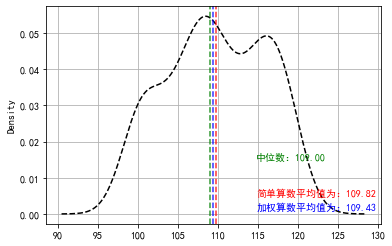

In [18]:
# (2)位置平均数

m = data['value'].mode()
print('众数为：', m.tolist())

med = data['value'].median()
print('中位数为：%i' % med)

data['value'].plot(kind = 'kde',style = '--k', grid = True) #密度曲线

plt.axvline(mean,color='r',linestyle='--',alpha=0.8)
plt.text(mean + 5, 0.005, '简单算数平均值为：%.2f' % mean, color = 'r')

plt.axvline(mean_w,color='b',linestyle='--',alpha=0.8)
plt.text(mean + 5, 0.001, '加权算数平均值为：%.2f' % mean_w, color = 'b')

plt.axvline(med,color='g',linestyle='--',alpha=0.8)
plt.text(mean + 5, 0.015, '中位数：%.2f' % med, color = 'g')

In [26]:
# 2、离中趋势度量
# 指一组数据中个数据以不同程度的距离偏离中心的趋势
# 极差与分位差、方差与标准差、离散系数

data = pd.DataFrame({'A_sale': np.random.rand(30)*1000,
                    'B_sale': np.random.rand(30)*1000},
                    index = pd.period_range('20170601', '20170630'))
data.head()

,A_sale,B_sale
2017-06-01,22.554308,936.045010
2017-06-02,356.780980,969.942175
2017-06-03,915.949926,789.239432
2017-06-04,755.170527,816.509786
2017-06-05,126.544101,544.846166


A销售额的极差为：887.03，B销售额的极差为：927.60
A销售额的分位差为：503.91，B销售额的分位差为：409.80


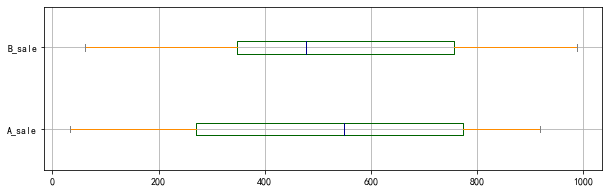

In [27]:
# (1)极差、分位差

data = pd.DataFrame({'A_sale': np.random.rand(30)*1000,
                    'B_sale': np.random.rand(30)*1000},
                    index = pd.period_range('20170601', '20170630'))

a_r = data['A_sale'].max() - data['A_sale'].min()
b_r = data['B_sale'].max() - data['B_sale'].min()
print('A销售额的极差为：%.2f，B销售额的极差为：%.2f' % (a_r, b_r))

sta = data['A_sale'].describe()
stb = data['B_sale'].describe()

a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print('A销售额的分位差为：%.2f，B销售额的分位差为：%.2f' % (a_iqr, b_iqr))

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid=True, color = color, figsize = (10,3))

A销售额的分位差为：278.99，B销售额的分位差为：278.55
A销售额的分位差为：77837.86，B销售额的分位差为：77590.55


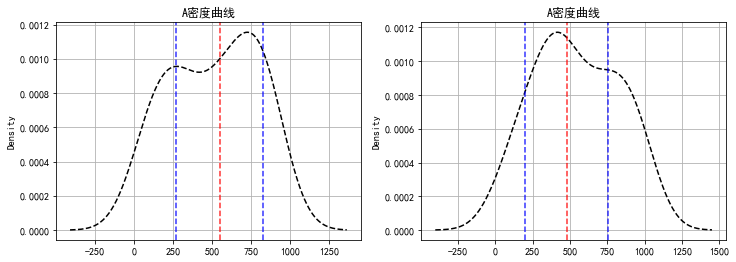

In [29]:
# (2)方差、标准差

a_std = sta.loc['std']
b_std = stb.loc['std']
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()
print('A销售额的分位差为：%.2f，B销售额的分位差为：%.2f' % (a_std, b_std))
print('A销售额的分位差为：%.2f，B销售额的分位差为：%.2f' % (a_var, b_var))
# 方差 -- 各组中数值与算数平均数离差平方的算数平均数
# 标准差 -- 方差平方根   常用的离中趋势指标--数值越大，离中趋势越明显

fig = plt.figure(figsize = (12,4))
axl = fig.add_subplot(1,2,1)
data['A_sale'].plot(kind = 'kde', style = 'k--', grid=True, title = 'A密度曲线')
plt.axvline(sta.loc['50%'],  color='r', linestyle='--', alpha=0.8)
plt.axvline(sta.loc['50%'] - a_std, color='b', linestyle='--', alpha=0.8)
plt.axvline(sta.loc['50%'] + a_std, color='b', linestyle='--', alpha=0.8)

axl = fig.add_subplot(1,2,2)
data['B_sale'].plot(kind = 'kde', style = 'k--', grid=True, title = 'A密度曲线')
plt.axvline(stb.loc['50%'],  color='r', linestyle='--', alpha=0.8)
plt.axvline(stb.loc['50%'] - b_std,  color='b', linestyle='--', alpha=0.8)
plt.axvline(stb.loc['50%'] + b_std,  color='b', linestyle='--', alpha=0.8)

# 【1.4】帕累托分析（贡献度分析） -- 20/80定律

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

超过80%累计占比的节点值索引为： B
超过80%累计占比的节点值索引位置为： 4


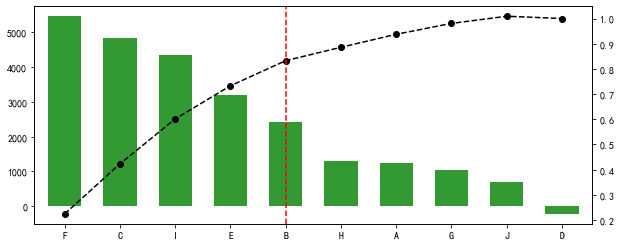

In [31]:
data = pd.Series(np.random.randn(10)*1200 + 3000,
                   index = list('ABCDEFGHIJ'))
data.sort_values(ascending=False, inplace=True)

plt.figure(figsize = (10,4))
data.plot(kind = 'bar', color='g', alpha = 0.8, width=0.6)

p = data.cumsum()/data.sum()
key = p[p>0.8].index[0]
key_num = data.index.tolist().index(key)
print('超过80%累计占比的节点值索引为：', key)
print('超过80%累计占比的节点值索引位置为：', key_num)

p.plot(style='--ko', secondary_y=True)
plt.axvline(key_num, color='r', linestyle ='--')

# 【1.6】正态性检验
- 利用观测数据判断总体是否服从正太分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验

- 直方图/QQ图判断/K-S检验


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

       value
0   9.951093
1  10.197920
2  10.661783
3  10.095026
4  10.203383


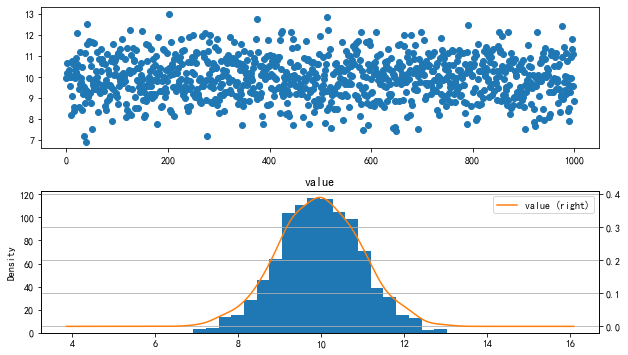

In [34]:
# 直方图检验

s = pd.DataFrame(np.random.randn(1000)+10, columns = ['value'])
print(s.head())

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)#2行1列的第一行
ax1.scatter(s.index, s.values)

ax2 = fig.add_subplot(2,1,2)
s.hist(bins = 20, ax = ax2)
s.plot(kind = 'kde', secondary_y=True, ax=ax2)
plt.grid()

       value
0  11.915420
1  10.634336
2   9.881009
3  11.404046
4  10.609007
均值为：10.01，标准差为：0.97
   index     value       p         q
0    656  6.985326 -0.0005 -3.107909
1    393  7.039129  0.0005 -3.052633
2    808  7.170823  0.0015 -2.917336
3     43  7.339747  0.0025 -2.743791
4    969  7.438787  0.0035 -2.642042


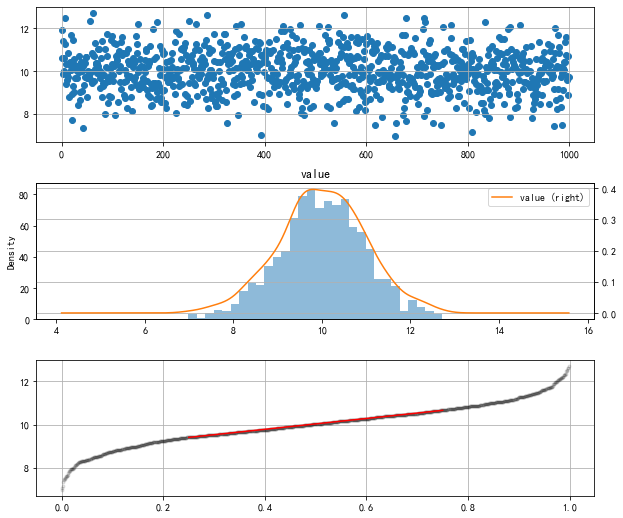

In [35]:
# QQ图检验
# QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近

# 绘制思路
# 1.做好数据清洗后，对数据进行排序
# 2.排序后，计算出每个数据对应的百分位p{i},即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （PI有多重算法，最常用为主）
# 3.绘制直方图+QQ图，直方图作为参考
s = pd.DataFrame(np.random.randn(1000)+10, columns = ['value'])
print(s.head())

mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean,std))

s.sort_values(by = 'value', inplace=True)
s_r = s.reset_index(drop = False)
s_r['p'] = (s_r.index - 0.5) / len(s_r)
s_r['q'] = (s_r['value'] - mean) / std
print(s_r.head())

st = s['value'].describe()
x1,y1 = 0.25,st['25%']
x2,y2 = 0.75,st['75%']

fig = plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(3,1,1)
ax1.scatter(s.index, s.values)
plt.grid()

ax2 = fig.add_subplot(3,1,2)
s.hist(bins=30, alpha=0.5, ax=ax2)
s.plot(kind='kde', secondary_y=True, ax=ax2)  # 直方图+密度图
plt.grid()

ax3 = fig.add_subplot(3,1,3)
ax3.plot(s_r['p'], s_r['value'], 'k.', alpha=0.1)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()

In [36]:
# K-S检验 
from scipy import stats
data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns=['value'])
print(df)
u = df['value'].mean()
std = df['value'].std()
print('均值为:',u)
stats.kstest(df['value'], 'norm', (u, std))
# .kstest:KS检验，参数分别是：待检验的数据，检验方法（norm正态分布），均值与标准差
# 结果返回两个值：statistic ——D值，pvalue——P值
# P值大于0.05为正态分布

    value
0      87
1      77
2      92
3      68
4      80
5      78
6      84
7      77
8      81
9      80
10     80
11     77
12     92
13     86
14     76
15     80
16     81
17     75
18     77
19     72
20     81
21     72
22     84
23     86
24     80
25     68
26     77
27     87
28     76
29     77
30     78
31     92
32     75
33     80
34     78
均值为: 79.74285714285715


KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)

# 【1.7】图示初判，Pearson相关系数（皮尔逊相关系数，前提必须正态分布）/ Sperman（斯皮尔曼相关系数）


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

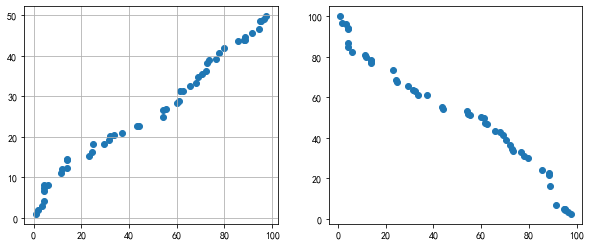

In [38]:
# 图示展示

data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*100).sort_values(ascending = False)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data1,data2)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(data1,data3)

,A,B,C,D
0,11.926392,-42.222219,-274.055012,-30.292624
1,-103.277598,-121.234788,48.679149,-11.325845
2,66.685609,-139.843985,57.241510,-7.313817
3,161.902402,134.691382,182.388036,-4.668364
4,21.941516,69.613234,41.009075,133.340569


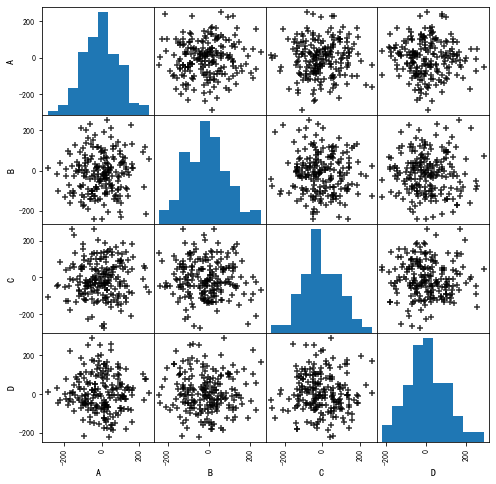

In [39]:
# 散点图矩阵初判多变量间关系
data = pd.DataFrame(np.random.randn(200,4)*100, columns = ['A','B','C','D'])
pd.plotting.scatter_matrix(data,figsize=(8,8),
                 c= 'k',marker='+',
                 diagonal='hist',
                 alpha=0.8,
                 range_padding=0.1)
data.head()

In [40]:
# Pearson相关系数

data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1': data1.values,
                    'value2': data2.values})
print(data.head())

data.corr()

     value1    value2
0  1.639445  0.169126
1  1.733396  1.656870
2  2.022266  1.761895
3  2.521412  2.086100
4  2.583260  2.232986


,value1,value2
value1,1.000000,0.997255
value2,0.997255,1.000000


In [41]:
# Sperman秩相关系数  非正态分布

data = pd.DataFrame({'智商': [106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数': [7,0,27,50,28,29,20,12,6,17]})
print(data)

data.sort_values('智商', inplace=True)
data['range1'] = np.arange(1, len(data)+1)
data.sort_values('每周看电视小时数', inplace=True)
data['range2'] = np.arange(1, len(data)+1)

data['d'] = data['range1'] - data['range2']
data['d2'] = data['d']**2

n = len(data)
rs = 1 - 6 * (data['d2'].sum() / (n * (n**2 - 1)))
print('Pearson相关系数为：%.4f' % rs)
# data.corr(method='spearman')

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
Pearson相关系数为：-0.1758


# 【2.1】缺失值处理
## 删除记录，数据插补，不处理
## 替换填充


In [16]:
'''
2.1缺失值处理
删除记录，数据插补，不处理

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
# isnull()、notnull()
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,100],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
print(df)
print('========')
print(s.isnull())
print(df.notnull())
print(df['value1'].notnull())
print('*'*30,)
s2 = s[s.isnull() == False]
df2 = df[df['value2'].notnull()]
print(s2)
print('========')
print(df2)

    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4      NaN      e
5      NaN    NaN
6     66.0    NaN
7     54.0      f
8      NaN      g
9     99.0    NaN
10   100.0      g
0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool
    value1  value2
0     True    True
1     True    True
2     True    True
3     True    True
4    False    True
5    False   False
6     True   False
7     True    True
8    False    True
9     True   False
10    True    True
0      True
1      True
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9      True
10     True
Name: value1, dtype: bool
******************************
0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4      NaN      e
7     54.0      f
8      NaN      g
10   100.0      

In [6]:
# 填充/替换缺失值 - fillna、replace

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,100],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
print(s,'\n')
s.fillna(0, inplace=True)
print(s)

df['value1'].fillna(method='backfill', inplace=True) # pad/ffill用前面特征值填充, 
#bfill/backfill用相邻的后面的特征值填充
df.style

0    12.0
1    33.0
2    45.0
3    23.0
4     NaN
5     NaN
6    66.0
7    54.0
8     NaN
9    99.0
dtype: float64 

0    12.0
1    33.0
2    45.0
3    23.0
4     0.0
5     0.0
6    66.0
7    54.0
8     0.0
9    99.0
dtype: float64


,value1,value2
0,12,a
1,33,b
2,45,c
3,23,d
4,66,e
5,66,nan
6,66,nan
7,54,f
8,99,g
9,99,nan


In [7]:
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
s.replace(np.nan, '缺失数据', inplace=True)
print(s)
print('*'*30)
s.replace([12,23,33], np.nan, inplace=True)
print(s)
#replace做替换
#inplace不创建新对象，直接对原对象进行修改

0      12
1      33
2      45
3      23
4    缺失数据
5    缺失数据
6      66
7      54
8    缺失数据
9      99
dtype: object
******************************
0     NaN
1     NaN
2      45
3     NaN
4    缺失数据
5    缺失数据
6      66
7      54
8    缺失数据
9      99
dtype: object


In [15]:
# 缺失值插补 (1)均值、中位数、众数

s = pd.Series([12,33,45,12,np.nan,np.nan,66,54,np.nan,99])
u =s.mean()
me = s.median()
print(me)
mod = s.mode().tolist()
print(s.fillna(me))

# (2)临近值插法：ffill/pad， bfill
s = pd.Series([12,33,45,12,np.nan,np.nan,66,54,np.nan,99])
s.fillna(method = 'ffill', inplace=True)
print(s)


45.0
0    12.0
1    33.0
2    45.0
3    12.0
4    45.0
5    45.0
6    66.0
7    54.0
8    45.0
9    99.0
dtype: float64
0    12.0
1    33.0
2    45.0
3    12.0
4    12.0
5    12.0
6    66.0
7    54.0
8    54.0
9    99.0
dtype: float64


         2
-0.1111 x + 0.3333 x + 10
<class 'numpy.poly1d'>


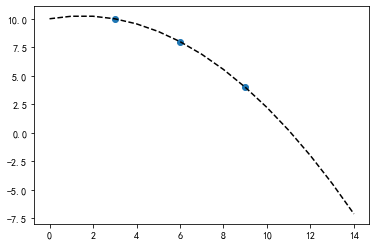

In [9]:
# (3)拉格朗日插值法
from scipy.interpolate import lagrange
x = [3,6,9]
y = [10,8,4]
print(lagrange(x,y))
print(type(lagrange(x,y))) # 第一排为x的幂，第二排为多项式
# print('插值10为：%.2f' % lagrange(x,y)(10))
plt.scatter(x,y)

df = pd.DataFrame({'x':np.arange(15)})
df['y'] = lagrange(x,y)(df['x'])
plt.plot(df['x'], df['y'], linestyle='--', color='k')

In [17]:
# 拉格朗日插值法，实际应用

data = pd.Series(np.random.rand(100)*100)
data[3,6,33,56,45,66,67,80,90] = np.nan
print(data.head())

0    11.277291
1    52.308118
2    36.150557
3          NaN
4     4.560201
dtype: float64


缺失值数量：9，缺失数据占比：9.00%
11.904080710214133
90.85632240100449
97.40074157714844
49.66009521484375
32.0029296875
-20.1962890625
317.9375
-678.0
728.0
finished!


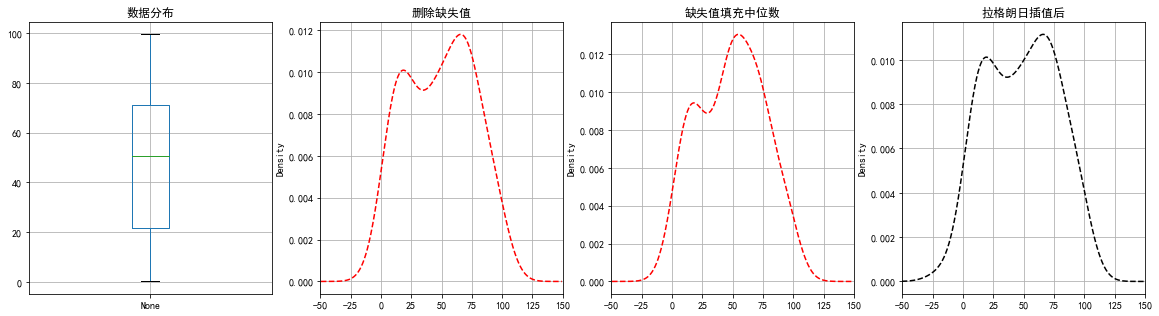

In [18]:
data_na = data[data.isnull()]
print('缺失值数量：%i，缺失数据占比：%.2f%%' % (len(data_na), len(data_na)/len(data)*100))

data_c = data.fillna(data.median()) # 中位数填充
fig,axes = plt.subplots(1,4,figsize=(20,5))
data.plot.box(ax=axes[0], grid=True, title='数据分布')
data.plot(kind='kde', style='--r', ax=axes[1], grid=True, title='删除缺失值', xlim=[-50,150])
data_c.plot(kind='kde', style='--r', ax=axes[2], grid=True, title='缺失值填充中位数', xlim=[-50,150])
def f(s,n,k=5):
    if n >= k: # n小于5就会出现Keyerror
        y = s.loc[list(range(n-k,n+1+k))] # 取数
    else:
        y = s.loc[list(range(0,n+1+k))]
    y = y[y.notnull()]  # 剔除空值
    return (lagrange(y.index, list(y))(n))
for i in range(len(data)):
    if data.isnull()[i]:
        data.loc[i] = f(data, i)
        print(f(data, i))
data.dropna(inplace=True) # 连续10个值为空
data.plot(kind='kde', style='--k', ax=axes[3], grid=True, title='拉格朗日插值后', xlim=[-50,150])
print('finished!')

# 【2.2】 异常值处理 ,离群点
- 3σ原则 / 箱型图分析   删除/修正填补

In [19]:
'''
2.2 异常值处理 ,离群点
3σ原则 / 箱型图分析   删除/修正填补
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [22]:
# 异常值分析
data = pd.Series(np.random.randn(10000)*100)
print(data.head())

u = data.mean()
std = data.std()
stats.kstest(data, 'norm', (u,std))   # k-s检验，正态检验

# fig = plt.figure(figsize=(10,6))
# ax1 = fig.add_subplot(2,1,1)
# data.plot(kind='kde', grid=True, style='-k', title='密度曲线')
# plt.axvline(3*std, hold=None, color='r', linestyle='--', alpha=0.8)
# plt.axvline(-3*std, hold=None, color='r', linestyle='--', alpha=0.8)

# error = data[np.abs(data - u) > 3*std]
# data_c = data[np.abs(data - u) <= 3*std]

# ax2 = fig.add_subplot(2,1,2)
# plt.scatter(data_c.index, data_c, color='k', marker='.', alpha=0.3)
# plt.scatter(error.index, error, color='r', marker='.', alpha=0.5)
# plt.xlim([-10, 10010])
# plt.grid()

0   -157.193449
1    164.981640
2    -18.192625
3   -224.476924
4   -122.161739
dtype: float64


KstestResult(statistic=0.004852137657419542, pvalue=0.9726227656252874)

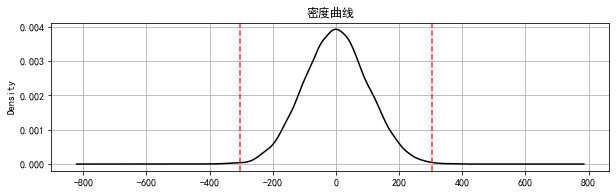

In [23]:
#绘制密度曲线 三倍标准差
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind='kde', grid=True, style='-k', title='密度曲线')
plt.axvline(3*std,  color='r', linestyle='--', alpha=0.8)
plt.axvline(-3*std,  color='r', linestyle='--', alpha=0.8)

异常值共71条


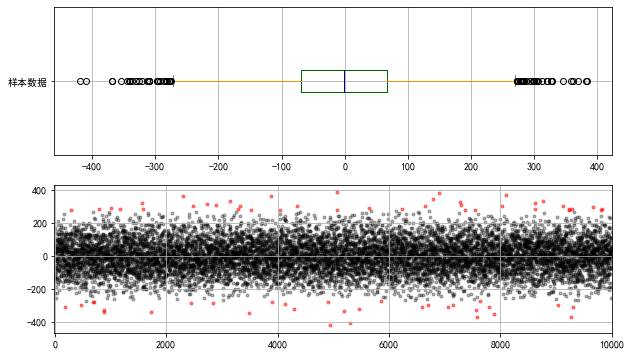

In [24]:
# 箱型图分析
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid=True, color=color, ax=ax1, label='样本数据')

s = data.describe()
q1 = s.loc['25%']
q3 = s.loc['75%']
iqr = q3 - q1
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr

ax2 = fig.add_subplot(2,1,2)
error = data[(data < mi) | (data > ma)]
data_c = data[(data >= mi) & (data <= ma)]
print('异常值共%i条' % len(error))
plt.scatter(data_c.index, data_c, color='k', marker='.', alpha=0.3)
plt.scatter(error.index, error, color='r', marker='.', alpha=0.5)
plt.xlim([-10, 10010])
plt.grid()

# 【2.3】数据归一化(标准化)
## 0-1标准化 / 
## Z-score标准化

In [25]:
'''
2.3数据归一化(标准化)
0-1标准化 / Z-score标准化
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [26]:
# 数据标准化 0-1标准化 x=(x - Min)/(Max - Min)
df = pd.DataFrame({'value1': np.random.rand(10)*20,
                  'value2': np.random.rand(10)*100})
print(df.head())

def f(df, *cols):
    df_n = df.copy()#备份，不修改原来的数据
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col+'_n'] = (df_n[col] - mi) / (ma - mi)#df_n[col+'_n']，表示新增列名
    return(df_n)

df_n = f(df, 'value1', 'value2')
df_n

      value1     value2
0   8.660959  60.245944
1  12.470013  12.522136
2  17.547601  92.770300
3   9.611824  83.007609
4   9.272720  88.489704


,value1,value2,value1_n,value2_n
0,8.660959,60.245944,0.000000,0.617224
1,12.470013,12.522136,0.381951,0.055567
2,17.547601,92.770300,0.891103,1.000000
3,9.611824,83.007609,0.095347,0.885104
4,9.272720,88.489704,0.061344,0.949622
5,17.142079,63.854947,0.850439,0.659698
6,18.633596,7.800628,1.000000,0.000000
7,12.659165,82.715009,0.400918,0.881660
8,14.098393,49.711292,0.545235,0.493243
9,12.042663,74.524169,0.339098,0.785263


In [31]:
# Z-score标准化
# Z分数，是一个分数与平均数的差再除以标准差的过程 z=(x-u)/σ
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。
#在原始分数低于平均值时Z则为负数，反之为正数
# 数学意义：一个给定分数距离平均数多少个标准差？

df = pd.DataFrame({'value1': np.random.rand(10)*100,
                  'value2': np.random.rand(10)*100})
print(df.head())

def f_z(df, *cols):
    df_n = df.copy()
    for col in cols:
        u = df_n[col].mean()
        std = df_n[col].std()
        df_n[col+'_zn'] = (df_n[col] - u) / std
    return(df_n)
df_z = f_z(df,'value1', 'value2')
u_z = df_z['value1_zn'].mean()
std_z = df_z['value1_zn'].std()#标准正态分布
print(df_z)
print('标准化后value的均值为：%.2f，标准差为：%.2f' % (u_z, std_z))


      value1     value2
0  11.007186   8.310776
1  70.771820  93.842851
2  27.271303  62.557406
3  48.021468  62.409019
4  73.323656  93.005171
      value1     value2  value1_zn  value2_zn
0  11.007186   8.310776  -1.900099  -1.443381
1  70.771820  93.842851   0.305561   1.027150
2  27.271303  62.557406  -1.299859   0.123493
3  48.021468  62.409019  -0.534059   0.119207
4  73.323656  93.005171   0.399738   1.002954
5  55.759976  23.535565  -0.248463  -1.003624
6  86.901083  52.330392   0.900824  -0.171907
7  93.071727  82.524404   1.128556   0.700225
8  88.710336   8.111181   0.967596  -1.449146
9  70.084793  96.192893   0.280206   1.095029
标准化后value的均值为：-0.00，标准差为：1.00


      value1     value2
A  10.136435  66.634389
B   5.472273  95.626617
C  11.617322  89.008035
D  22.668027  62.359345
E  22.162190  75.501705


,value1,value2,value1_n,value2_n,f
E,22.162190,75.501705,0.877175,0.786661,0.840969
D,22.668027,62.359345,0.899122,0.647342,0.798410
F,18.703527,66.167328,0.727109,0.687710,0.711349
C,11.617322,89.008035,0.419651,0.929838,0.623726
J,18.216167,47.244494,0.705963,0.487114,0.618424
G,24.993032,1.293550,1.000000,0.000000,0.600000
I,17.439918,35.184766,0.672283,0.359272,0.547079
B,5.472273,95.626617,0.153028,1.000000,0.491817
A,10.136435,66.634389,0.355398,0.692661,0.490303
H,1.945341,37.304015,0.000000,0.381737,0.152695


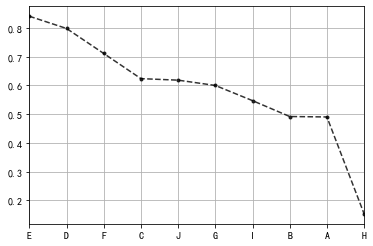

In [32]:
# 案例应用

df = pd.DataFrame({'value1': np.random.rand(10)*30,
                  'value2': np.random.rand(10)*100},
                 index = list('ABCDEFGHIJ'))
print(df.head())

df_n1 = f(df, 'value1', 'value2')
df_n1['f'] = df_n1['value1_n'] * 0.6 + df_n1['value2_n'] * 0.4#新创建一列f,分别以0.6,0.4作为权重
df_n1.sort_values(by='f', inplace=True, ascending=False)#ascending=False按降序排序
df_n1['f'].plot(kind='line', style='--.k', alpha=0.8, grid=True)
df_n1

# 【2.4】数据连续属性离散化
## 等宽法
## / 等频法

In [33]:
'''
2.4数据连续属性离散化
等宽法 / 等频法
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
<class 'pandas.core.arrays.categorical.Categorical'>
******************************
[0 0 0 1 0 0 2 1 3 2 2 1] <class 'numpy.ndarray'>
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]') <class 'pandas.core.indexes.interval.IntervalIndex'>
(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64
******************************
[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]
******************************
[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < M

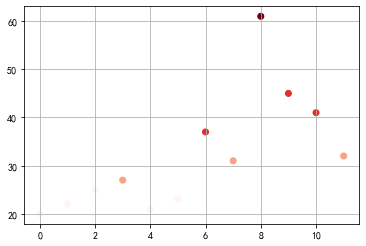

In [34]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)
print(cats)
print(type(cats))
print('*'*30)
# 返回的是一个特殊的Categorical对象 —— 一组表示面元名称的字符串

print(cats.codes, type(cats.codes)) # 0-3对应分组后的四个区间，用代号来注释数据对应区间，结果为ndarray
print(cats.categories, type(cats.categories)) # 四个区间，结果为index
print(pd.value_counts(cats))
print('*'*30)
# cut结果含有一个表示不同分类名称的层级数组以及一个年龄数据进行标号的代号属性

print(pd.cut(ages,[18,26,36,61,100], right=False))#以左为闭区间
print('*'*30)

group_names=['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
print(pd.cut(ages, bins, labels=group_names))
print('*'*30)
#


df = pd.DataFrame({'ages': ages})
group_names=['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
s = pd.cut(df['ages'], bins)
df['label'] = s
cut_counts = s.value_counts(sort=False)
cut_counts
print(df)

plt.scatter(df.index, df['ages'], cmap='Reds', c=cats.codes)
plt.grid()


0                   (0.465, 2.835]
1    (-3.4259999999999997, -0.634]
2    (-3.4259999999999997, -0.634]
3                   (0.465, 2.835]
4                   (0.465, 2.835]
dtype: category
Categories (3, interval[float64]): [(-3.4259999999999997, -0.634] < (-0.634, 0.465] < (0.465, 2.835]]
(-0.634, 0.465]                  400
(0.465, 2.835]                   300
(-3.4259999999999997, -0.634]    300
dtype: int64
******************************


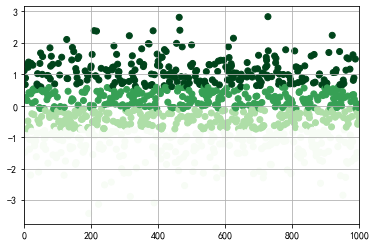

In [35]:
# 等频法 —— 以相同数量的记录放进每个区间 qcut方法

data = np.random.randn(1000)
s = pd.Series(data)
cats = pd.qcut(s, [0,0.3,0.7,1.0]) # 按不同的分位数进行切割，可以蚕食pd.cut(data, 10)
print(cats.head())
print(pd.value_counts(cats))
print('*'*30)
# quct —— 根据样本分位数对数据进行面元划分，得到大小基本相等的面元，但并不能保证每个面元含有相同数据个数
# 也可以设置自己定义的分位数——pd.qcut(data1, [0,0.1,0.5,0.9,1])

plt.scatter(s.index, s, cmap='Greens', c=pd.qcut(data, 4).codes)
plt.xlim([0,1000])
plt.grid()

# 【3.2.1线性回归】
- 指确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法
- 按自变量和因变量关系类型：线性回归分析和非线性回归分析
- sklearn模块的LinerRegression

In [36]:
'''
3.2.1线性回归
指确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法
按自变量和因变量关系类型：线性回归分析和非线性回归分析
sklearn模块的LinerRegression
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

[4.00448414]
8.447659499431026


Text(0.5, 1.0, '线性回归拟合')

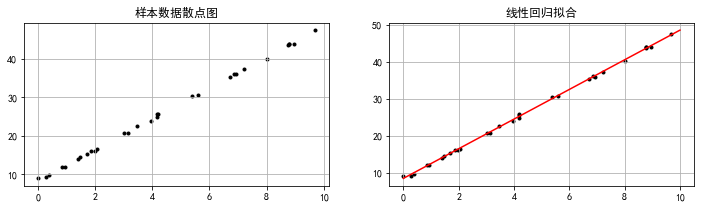

In [45]:
# 简单线性回归
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4*xtrain + rng.rand(30)
# np.random.RandomState 随机数种子，对于一个随机数发生器，只要该种子相同，产生的随机数序列就是相同的
# 生成随机数据x与y
# 样本关系：y = 8 + 4*x

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(1,2,1)
plt.scatter(xtrain, ytrain, marker='.', color='k')
plt.grid()
plt.title('样本数据散点图')

model = LinearRegression()
model.fit(xtrain[:, np.newaxis], ytrain)#将x.train转置一下成为一列数据
print(model.coef_)     # 斜率
print(model.intercept_) # 截距
#做预测分析
xtest = np.linspace(0,10,1000)#0到10的1000个样本的线性空间
ytest = model.predict(xtest[:, np.newaxis])

ax2 = fig.add_subplot(1,2,2)
plt.scatter(xtrain, ytrain, marker='.', color='k')
plt.plot(xtest, ytest, color='r')
plt.grid()
plt.title('线性回归拟合')

Text(0.5, 1.0, '误差')

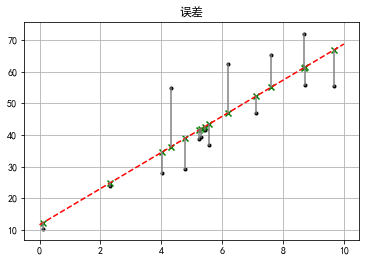

In [46]:
# 误差
rng = np.random.RandomState(8)#产生随机数种子
xtrain = 10*rng.rand(15)
ytrain = 8 + 4*xtrain + rng.rand(15)*30
model.fit(xtrain[:, np.newaxis], ytrain)#xtrain[:,np.newaxis]变成列
xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:, np.newaxis])

plt.plot(xtest, ytest, color='r', linestyle='--')  # 拟合直线
plt.scatter(xtrain, ytrain, marker='.', color='k') # 样本数据散点图
ytest2 = model.predict(xtrain[:, np.newaxis]) # 样本数据x在拟合直线上的y值
plt.scatter(xtrain, ytest2, marker='x', color='g') # ytest2散点图
plt.plot([xtrain, xtrain], [ytrain, ytest2], color='gray') # 误差线
plt.grid()
plt.title('误差')

In [43]:
#np.newaxis的作用就是在这一位置增加一个一维，这一位置指的是np.newaxis所在的位置，
# 比较抽象，需要配合例子理解。
x1 = np.array([1, 2, 3, 4, 5])
# the shape of x1 is (5,)

x1_new = x1[:, np.newaxis]
print(x1)
print(x1_new)
# now, the shape of x1_new is (5, 1)
# array([[1],
#        [2],
#        [3],
#        [4],
#        [5]])
x2_new = x1[np.newaxis,:]
print(x2_new)
# now, the shape of x1_new is (1, 5)
# array([[1, 2, 3, 4, 5]])
x1.shape
x1_new.shape

[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]
[[1 2 3 4 5]]


(5, 1)

         b1        b2        b3        b4          y
0  2.219932  8.707323  2.067192  9.186109  60.034105
1  4.884112  6.117439  7.659079  5.184180  24.477270
2  2.968005  1.877212  0.807413  7.384403  47.129990
3  4.413092  1.583099  8.799370  2.740865   2.810948
4  4.142350  2.960799  6.287879  5.798378  24.378742
斜率a为： [ 1.5  2.  -4.   3. ]
截距b为：20.0000
线性回归函数为：
y = 1.5x1 + 2.0x2 + -4.0x3 + 3.0x4 + 20.0


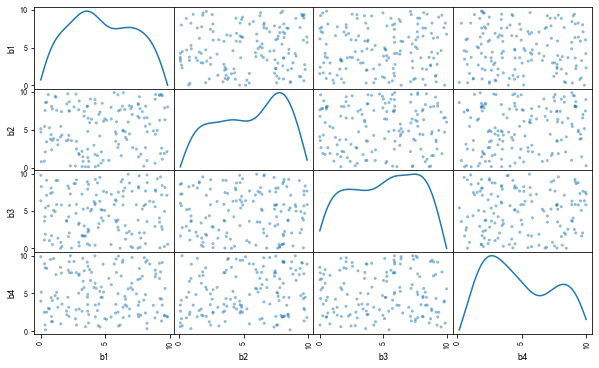

In [44]:
# 多元线性回归

rng = np.random.RandomState(5)
xtrain = 10 * rng.rand(150, 4)
# print(xtrain)
ytrain = 20 + np.dot(xtrain, [1.5, 2, -4, 3])#每个xi前面的斜率β
df = pd.DataFrame(xtrain, columns=['b1','b2','b3','b4'])
df['y'] = ytrain #新增加一列
pd.plotting.scatter_matrix(df[['b1','b2','b3','b4']], figsize=(10,6),
                 diagonal='kde',
                 alpha=0.5,
                 range_padding=0.1)
print(df.head())
# 创建数据，其中包括4个自变量
# 4个变量相互独立

model = LinearRegression()
model.fit(df[['b1','b2','b3','b4']], df['y'])
# 多元回归拟合

print('斜率a为：', model.coef_)
print('截距b为：%.4f' % model.intercept_)
print('线性回归函数为：\ny = %.1fx1 + %.1fx2 + %.1fx3 + %.1fx4 + %.1f'
     % (model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.intercept_))
#从对角线的图可以看出四个变量无明显的变化的相关性，可以认为相互独立

# 【3.3.1】 最邻近分类——KNN
- 距离空间里，如果一个样本的最接近的k个邻居里，绝大多数属于某个类别，则该样本也属于这个类别
电影分类、植物分类实例

In [47]:
'''
3.3.1 最邻近分类的Python实现方法——KNN
距离空间里，如果一个样本的最接近的k个邻居里，绝大多数属于某个类别，则该样本也属于这个类别
电影分类、植物分类实例
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

Text(18, 90, '《你的名字》')

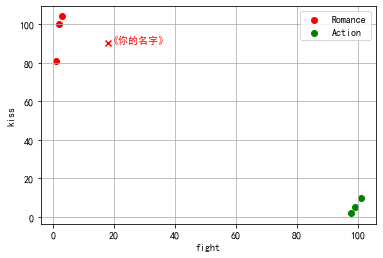

In [52]:
from sklearn import neighbors#邻近分类
import warnings
warnings.filterwarnings('ignore')

data = pd.DataFrame({'name': ['北京遇上西雅图', '喜欢你', '疯狂动物城', '战狼2', '力王', '敢死队'],
                    'fight': [3,2,1,101,99,98],
                    'kiss': [104,100,81,10,5,2],
                    'type': ['Romance','Romance','Romance','Action','Action','Action']})

plt.scatter(data[data['type'] == 'Romance']['fight'], data[data['type'] == 'Romance']['kiss'], color='r', marker='o', label='Romance')
plt.scatter(data[data['type'] == 'Action']['fight'], data[data['type'] == 'Action']['kiss'], color='g', marker='o', label='Action')
plt.grid()
plt.legend() # 在图上放一个label

knn = neighbors.KNeighborsClassifier()
knn.fit(data[['fight', 'kiss']], data['type'])

knn.predict([[18,90]])
plt.scatter(18, 90, color='r', marker='x', label='Romance')
plt.ylabel('kiss')
plt.xlabel('fight')
plt.text(18,90,'《你的名字》', color='r')

In [55]:
data.style

,name,fight,kiss,type
0,北京遇上西雅图,3,104,Romance
1,喜欢你,2,100,Romance
2,疯狂动物城,1,81,Romance
3,战狼2,101,10,Action
4,力王,99,5,Action
5,敢死队,98,2,Action


,fight,kiss,typetest
0,-18.853347,-46.673758,Action
1,-33.090599,25.172830,Romance
2,-2.933462,12.064297,Romance
3,24.908449,-75.471968,Action
4,-139.376959,-52.155566,Romance


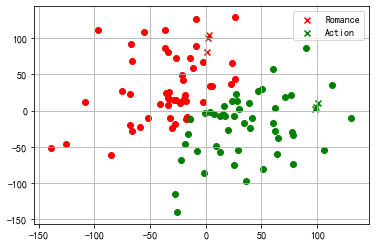

In [56]:
# 案例一：电影分类  给定随机数据进行模拟预测
data2 = pd.DataFrame(np.random.randn(100, 2)*50, columns=['fight', 'kiss'])
data2['typetest'] = knn.predict(data2)

plt.scatter(data[data['type'] == 'Romance']['fight'], data[data['type'] == 'Romance']['kiss'], color='r', marker='x', label='Romance')
plt.scatter(data[data['type'] == 'Action']['fight'], data[data['type'] == 'Action']['kiss'], color='g', marker='x', label='Action')
plt.grid()
plt.legend()
plt.scatter(data2[data2['typetest'] == 'Romance']['fight'], data2[data2['typetest'] == 'Romance']['kiss'], color='r', marker='o', label='Romance')
plt.scatter(data2[data2['typetest'] == 'Action']['fight'], data2[data2['typetest'] == 'Action']['kiss'], color='g', marker='o', label='Action')

data2.head()

In [57]:
# 案例二：植物分类
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())
print('数据长度为：%i条, 数据类型:'% len(iris['data']),type(iris))
print(iris.feature_names)
print(iris.target_names)
print(iris.data[:5])
# feature_names - 萼片长度，萼片宽度，花瓣长度，花瓣宽度
# 目标分类：Iris setosa 山鸢尾，Iris versicolor 变色鸢尾，Iris virginica 北美鸢尾

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
ty = pd.DataFrame({'target': [0,1,2],
                  'target_names': iris.target_names})

df = pd.merge(data, ty, on='target')
df.head()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
数据长度为：150条, 数据类型: <class 'sklearn.utils.Bunch'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [58]:
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, df['target_names'])

pre_data = knn.predict([[5.9, 3.5, 1.4, 0.2]])
pre_data

array(['setosa'], dtype=object)

# 3.4.1 聚类分析（无监督分析）
- 将观测对象的群体按照相似性和相异性进行不同群组的划分，划分后每个群组内部各对象相似度很高。不同组对象相异度很高
PCA主成分、K-means聚类

In [20]:
'''
3.4.1 聚类分析（无监督分析）
将观测对象的群体按照相似性和相异性进行不同群组的划分，划分后每个群组内部各对象相似度很高。不同组对象相异度很高
PCA主成分、K-means聚类
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

         X1        X2
0 -1.174787 -1.404131
1 -1.374449 -1.294660
2 -2.316007 -2.166109
3  0.947847  1.460480
4  1.762375  1.640622 
 (200, 2)


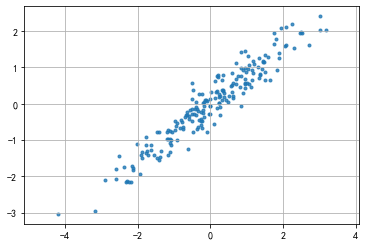

In [21]:
'''
1、PCA主成分
最广泛无监督算法 + 基础的降维算法
通过线性变换将原始数据变换为一组各维度线性无关的表示，用于提取数据的主要特征分量——高纬数据的降维
二维和多维降维
'''
# 二维
rng = np.random.RandomState(8)
data = np.dot(rng.rand(2,2), rng.randn(2,200)).T
# print(data)
df = pd.DataFrame({'X1': data[:, 0],
                  'X2': data[:, 1]})#第0和1列
print(df.head(), '\n', df.shape)

plt.scatter(df['X1'], df['X2'], alpha=0.8, marker='.')
plt.axis('equal')
plt.grid()

[2.79699086]
[[-0.7788006  -0.62727158]]
1
original shape: (200, 2)
Transformed shape: (200, 1)
[[ 1.77885258]
 [ 1.8656813 ]
 [ 3.14560277]
 [-1.67114513]
 [-2.41849842]]


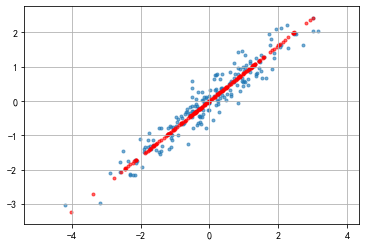

In [22]:
# 二维数据降维
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(df)
# sklearn.decomposition.PCA(n_components=None, copy=True, thiten=False)

print(pca.explained_variance_) # 输出特征值
print(pca.components_) # 输出特征向量, 返回具有最大方差的成分
print(pca.n_components_) # 输出成分个数
# explained_variance_ratio_: 返回所保留的n个成分各自的方差百分比
# A1 = 0.77*X1 +0.62*X2

x_pca = pca.transform(df) # 数据转换
x_new = pca.inverse_transform(x_pca) # 将降维后的数据转换成原始数据
print('original shape:', df.shape)
print('Transformed shape:', x_pca.shape)
print(x_pca[:5])

plt.scatter(df['X1'], df['X2'], alpha=0.6, marker='.')
plt.scatter(x_new[:,0], x_new[:,1], alpha=0.6, marker='.', color='r')
plt.axis('equal')
plt.grid()

In [23]:
# 多维数据降维
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())
print('数据长度为：%i条，数据形状为：%s条' % (len(digits['data']), str(digits.data.shape)))
print(digits.data[:2])

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
数据长度为：1797条，数据形状为：(1797, 64)条
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]


original shape: (1797, 64)
transformed shape: (1797, 2)
[179.0069301  163.71774688]


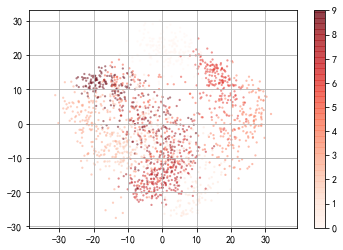

In [24]:
pca = PCA(n_components=2) #降为二维
projected = pca.fit_transform(digits.data)
print('original shape:', digits.data.shape)
print('transformed shape:', projected.shape)
print(pca.explained_variance_)
plt.scatter(projected[:, 0], projected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap='Reds', s=5)
plt.axis('equal')
plt.grid()
plt.colorbar()

original shape: (1797, 64)
transformed shape: (1797, 10)
[179.0069301  163.71774688 141.78843909 101.10037505  69.51316471
  59.10852274  51.88451624  44.01508398  40.31073844  37.01150529]


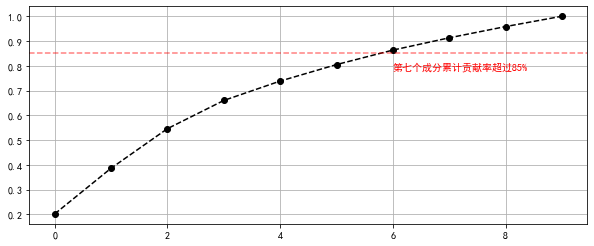

In [25]:
pca = PCA(n_components=10)
projected = pca.fit_transform(digits.data)
print('original shape:', digits.data.shape)
print('transformed shape:', projected.shape)
print(pca.explained_variance_)
s = pca.explained_variance_

c_s = pd.DataFrame({'b': s,
                   'b_sum': s.cumsum()/s.sum()})
c_s['b_sum'].plot(style='--ko', figsize=(10,4))
plt.axhline(0.85, color='r', linestyle='--', alpha=0.5)
plt.text(6, c_s['b_sum'].iloc[6]-0.08, '第七个成分累计贡献率超过85%', color='r')
plt.grid()

# 【3.4.2】K-Means聚类

In [68]:
'''
2、K-Means聚类

'''
from sklearn.datasets.samples_generator import make_blobs

# 创建数据
x, y_true = make_blobs(n_samples=300,    # 300条数据
                      centers=4,         # 四类数据
                      cluster_std=0.5,   # 方差
                      random_state= 0)   # 随机数种子
print(x[:5])
print(y_true[:5])

[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]]
[1 3 0 3 1]


[2 3 1 3 2 2 0 1 3 3 0 3 1 3 2 1 1 2 0 0 2 2 1 0 0 1 2 1 0 1 3 3 1 3 3 3 3
 3 0 2 1 0 1 1 0 0 3 0 3 2 0 2 3 2 2 0 3 0 3 2 3 1 3 0 0 0 3 2 3 0 1 0 3 0
 0 3 0 1 2 3 2 1 2 2 3 1 2 1 3 3 1 2 3 0 0 1 2 2 1 0 3 2 3 2 1 2 2 1 3 1 0
 0 2 3 2 1 3 2 2 1 0 2 0 2 2 2 2 0 2 0 3 0 0 2 3 0 0 3 1 3 3 0 1 0 1 0 3 1
 3 3 3 1 3 1 2 0 3 0 2 1 3 1 1 2 1 0 0 1 2 1 1 3 2 1 0 3 2 2 1 0 2 1 0 0 1
 1 1 1 2 3 1 0 1 1 0 0 0 1 0 3 1 0 2 0 1 3 0 3 1 3 1 0 1 1 3 0 0 2 2 1 3 2
 2 0 2 0 1 3 3 1 1 3 1 2 0 1 2 0 3 0 2 1 2 3 3 3 3 0 0 3 1 0 2 1 0 0 0 2 2
 3 1 1 0 2 3 0 1 3 1 2 2 0 0 1 2 2 2 1 3 3 2 2 1 2 2 2 3 0 3 1 2 2 3 3 3 2
 2 1 3 0]


array([[-1.57480456,  2.84532424],
       [ 0.95415778,  4.39985544],
       [ 1.99469693,  0.8727049 ],
       [-1.35241261,  7.76731726]])

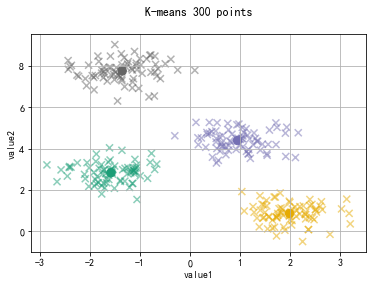

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
print(y_kmeans)
centroids = kmeans.cluster_centers_

plt.scatter(x[:,0], x[:,1], c=y_kmeans, cmap='Dark2', s=50, alpha=0.5, marker='x')
plt.scatter(centroids[:,0], centroids[:,1], c=[0,1,2,3], cmap='Dark2', s=70,  marker='o')
plt.title('K-means 300 points\n')
plt.xlabel('value1')
plt.ylabel('value2')
plt.grid()
centroids

# 3.5 蒙塔卡罗模拟理论（Monte Carlo）随机抽样或统计试验方法
- 使用随机数解决计算问题
1、π的计算
2、计算积分 y = x**2
3、排队上厕所问题

In [72]:
'''
3.5 蒙塔卡罗模拟理论（Monte Carlo）随机抽样或统计试验方法
使用随机数解决计算问题
1、π的计算
2、计算积分 y = x**2
3、排队上厕所问题
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

3.1224


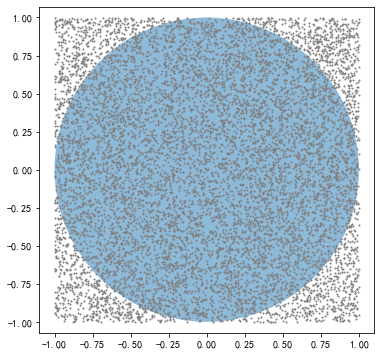

In [73]:
#πd的计算
n = 10000
r = 1.0
a,b = (0.0,0.0)

xmin, xmax = a-r, a+r
ymin, ymax = b-r, b+r

x = np.random.uniform(xmin, ymax, n)#uniform均匀分布
y = np.random.uniform(ymin, ymax, n)

fig = plt.figure(figsize=(6,6))
axes= fig.add_subplot(1,1,1)
plt.plot(x,y,'ro', markersize=1, color='grey')
plt.axis('equal')

d = np.sqrt((x-a)**2 + (y-b)**2)
res = sum(np.where(d<r, 1, 0))#where小于则返回1 不小于则返回0
pi = 4*res/n # πr**2/4r**2 == res/n
print(pi)

from matplotlib.patches import Circle
circle = Circle(xy=(a,b), radius=r, alpha=0.5)
axes.add_patch(circle)
# plt.grid(True, linestyle="--", linewidth="0.8")
plt.show()

integral:  0.336


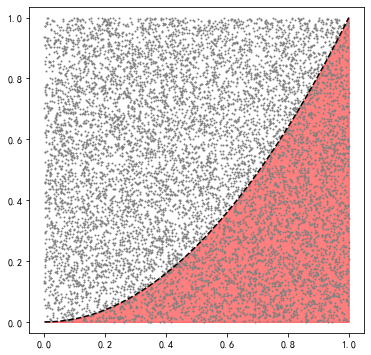

In [74]:
# 2、计算积分 y = x**2
n = 10000
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

x = np.random.uniform(xmin, ymax, n)
y = np.random.uniform(ymin, ymax, n)

def f(x):
    return x**2
res = sum(np.where(y<f(x), 1, 0))
integral = res/n
print('integral: ', integral)

fig = plt.figure(figsize=(6,6))
axes = fig.add_subplot(111)
axes.plot(x, y, 'ro', markersize=1, color='gray')
plt.axis('equal')

xi = np.linspace(0,1,100)
yi = xi**2
plt.plot(xi,yi,'--k')
plt.fill_between(xi,yi,0,color='r', alpha=0.5, label='area')

arerage waiting time is 11.574781


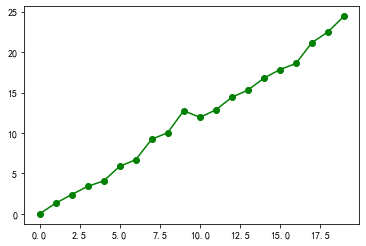

In [75]:
# 厕所排队问题
# 1、两场电影结束时间相隔较长，互不影响
# 2、每场电影结束之后会有20个人想上厕所
# 3、这20个人会在0到10分钟之内全部到达厕所
# 4、每个人上厕所时间在1-3分钟之内
# 首先模拟最简单的情况，也就是厕所只有一个位置，不考虑两人共用的情况则每人必须等上一人才可继续
# 到达时间、等待时间、上厕所时间、结束时间

arrivingtime = np.random.uniform(0,10,size=20)
arrivingtime.sort()
workingtime = np.random.uniform(1,3,size=20)

startingtime = [0 for i in range(20)]
finishtime = [0 for i in range(20)]
waitingtime = [0 for i in range(20)]
emptygtime = [0 for i in range(20)]

startingtime[0] = arrivingtime[0]
finishtime[0] = startingtime[0] + workingtime[0]
waitingtime[0] = startingtime[0] - arrivingtime[0]
for i in range(1, len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i]:
        startingtime[i]  = finishtime[i-1]
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - finishtime[i-1]
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]

print('arerage waiting time is %f' % np.mean(waitingtime))

fig = plt.figure(figsize=(6,4))
plt.plot(waitingtime, '-go')